# <b>Random Forest</b>

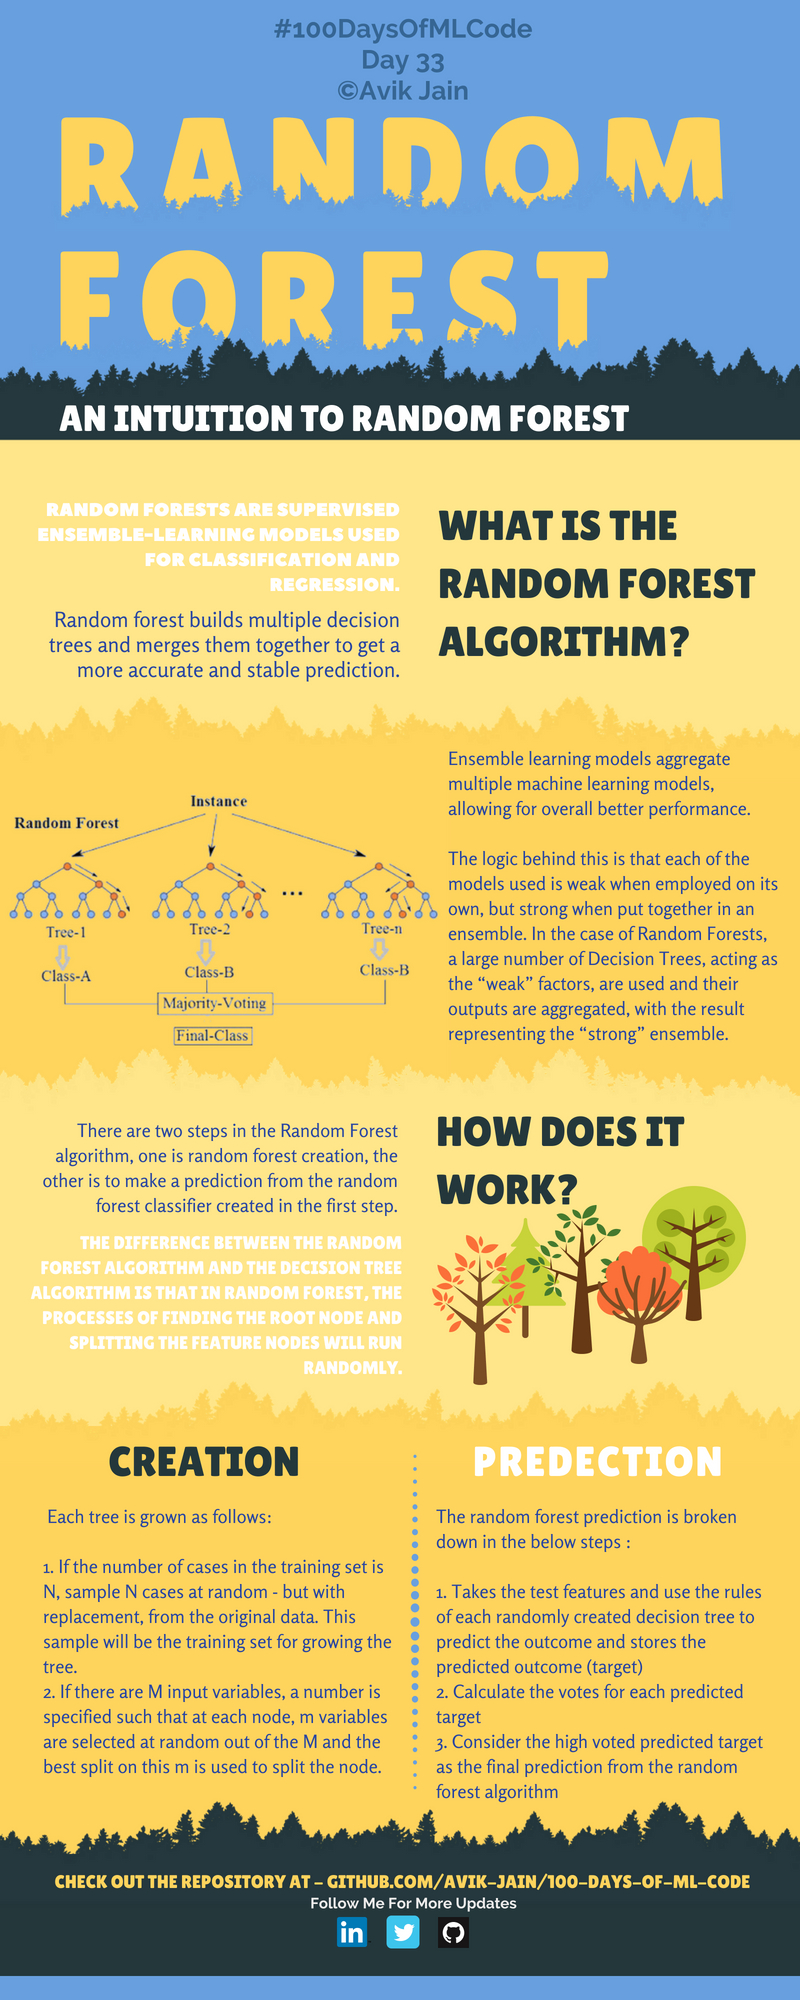

## Importing Liraries

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

In [23]:
dataset = pd.read_csv("datasets/Social_Network_Ads.csv")

In [24]:
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values

## Splitting the dataset into the <b>Training and Testing Set</b>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting Random Forest to the Training set 

In [27]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 0)
Rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the test set results

In [28]:
Y_pred = Rf.predict(X_test)

## Making the Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[63,  5],
       [ 4, 28]], dtype=int64)

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


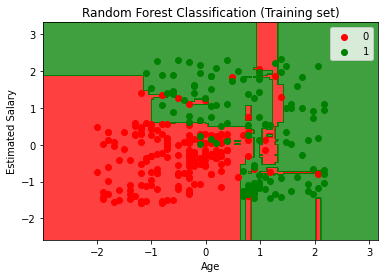

In [30]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


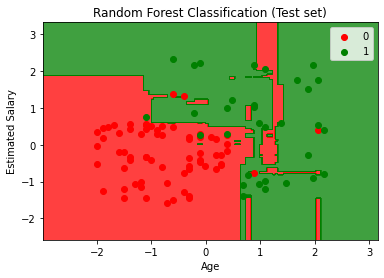

In [31]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()